In [1]:
from keras.preprocessing.image import ImageDataGenerator


from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
trainDataGen = ImageDataGenerator(rescale=1./255,
                                 rotation_range = 30,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )

trainGenSet = trainDataGen.flow_from_directory(
    "./dataset/train dataset",
    batch_size=32,
    target_size=(100, 100),
    class_mode='categorical'
)

Found 894 images belonging to 3 classes.


In [3]:
testDataGen = ImageDataGenerator(rescale=1./255)

testGenSet = testDataGen.flow_from_directory(
    "./dataset/test dataset",
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

Found 239 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 256)       2

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
model.fit_generator(
    trainGenSet,
    steps_per_epoch=20,
    epochs=200,
    validation_data=testGenSet,
    validation_steps=10,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
20/20 [==============================] - 13s 643ms/step - loss: 1.2707 - accuracy: 0.3187 - val_loss: 1.0985 - val_accuracy: 0.3473
Epoch 2/200
20/20 [==============================] - 12s 591ms/step - loss: 1.0984 - accuracy: 0.3354
Epoch 3/200
20/20 [==============================] - 12s 590ms/step - loss: 1.0917 - accuracy: 0.4028
Epoch 4/200
20/20 [==============================] - 12s 584ms/step - loss: 1.1022 - accuracy: 0.3589
Epoch 5/200
20/20 [==============================] - 12s 587ms/step - loss: 1.0924 - accuracy: 0.4044
Epoch 6/200
20/20 [==============================] - 12s 594ms/step - loss: 1.0554 - accuracy: 0.4702
Epoch 7/200
20/20 [==============================] - 12s 598ms/step - loss: 1.0370 - accuracy: 0.4734
Epoch 8/200
20/20 [==============================] - 12s 580ms/step - loss: 1.0386 - accuracy: 0.4718
Epoch 9/200
20/20 [==============================] - 12s 606ms/ste

20/20 [==============================] - 12s 589ms/step - loss: 0.4084 - accuracy: 0.8401
Epoch 154/200
20/20 [==============================] - 13s 632ms/step - loss: 0.3955 - accuracy: 0.8339
Epoch 155/200
20/20 [==============================] - 12s 612ms/step - loss: 0.4474 - accuracy: 0.8056
Epoch 156/200
20/20 [==============================] - 12s 608ms/step - loss: 0.4344 - accuracy: 0.8339
Epoch 157/200
20/20 [==============================] - 12s 601ms/step - loss: 0.3916 - accuracy: 0.8391
Epoch 158/200
20/20 [==============================] - 12s 596ms/step - loss: 0.3703 - accuracy: 0.8531
Epoch 159/200
20/20 [==============================] - 12s 585ms/step - loss: 0.4094 - accuracy: 0.8313
Epoch 160/200
20/20 [==============================] - 12s 585ms/step - loss: 0.4081 - accuracy: 0.8323
Epoch 161/200
20/20 [==============================] - 12s 601ms/step - loss: 0.3929 - accuracy: 0.8464
Epoch 162/200
20/20 [==============================] - 12s 599ms/step - loss: 

In [8]:
model.save("./bts_cnn_model.h5")

#### 정확도 : 약 88%

In [2]:
from keras.models import load_model

model = load_model("./bts_cnn_model.h5")

{0: 'Jimin', 1: 'Jungkook', 2: 'V'}
Jimin


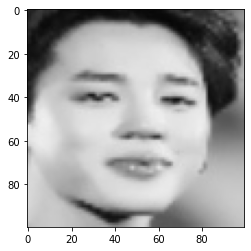

In [13]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img = image.load_img("./dataset/test dataset/Jimin/Jimin face (350).jpg")
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
class_indices = {0: "Jimin", 1 : "Jungkook", 2 : "V"}
print(class_indices)
print(class_indices[np.argmax(result[0])])